# Project: Health and Sleep

The purpose of this project is to analyze the data of 100 patients to understand the lifestyle factors which affect sleep quality.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

# Table Information

In [2]:
df = pd.read_csv("/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv")
df.size
df.columns
df.info()
df.describe()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


0

In [3]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


# Add Numeric Columns to Table

This numeric form of the categorical variables will allow us to perform analysis on the data, such as correlation or mean values.

In the new Dietary Numeric column, a score of 1 means unhealthy, and a score of 3 means healthy.

In the new Physical Activity Numeric column, a score of 1 means low, and a score of 3 means high.

In [4]:
physical_map = {'low': 1, 'medium': 2, 'high': 3}
df['Physical Activity Numeric'] = df['Physical Activity Level'].map(physical_map)
diet_map = {'unhealthy':1, 'medium': 2, 'healthy': 3}
df['Dietary Numeric'] = df['Dietary Habits'].map(diet_map)

In [5]:
# function to change times from string to numeric
def convert_time(time):
    h = float(time.split(':')[0])
    m = float(time.split(':')[1])
    return h + m/60

df['Bedtime Numeric'] = df['Bedtime'].apply(convert_time)
df['Wakeup Numeric'] = df['Wake-up Time'].apply(convert_time)
df['Sleep Hours'] = (df['Wakeup Numeric'] - df['Bedtime Numeric']) % 24
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Physical Activity Numeric,Dietary Numeric,Bedtime Numeric,Wakeup Numeric,Sleep Hours
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no,2,3,23.00,6.50,7.5
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes,1,1,0.50,7.00,6.5
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no,3,3,22.75,6.75,8.0
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no,1,1,1.00,6.50,5.5
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no,3,2,23.50,7.00,7.5


# Correlation Table for Sleep Quality

In [6]:
#numeric_df = df.select_dtypes(include=['number'])
#correlation_matrix = numeric_df.corr()

correlation_matrix = df[['Sleep Quality', 'Age', 'Bedtime Numeric', 'Wakeup Numeric', 'Sleep Hours', 'Dietary Numeric', 'Physical Activity Numeric', 'Daily Steps', 'Calories Burned']].corr()
print(correlation_matrix['Sleep Quality'].sort_values(ascending=False))

Sleep Quality                1.000000
Daily Steps                  0.976277
Calories Burned              0.973557
Sleep Hours                  0.918909
Dietary Numeric              0.902498
Physical Activity Numeric    0.875203
Bedtime Numeric              0.853312
Wakeup Numeric              -0.048526
Age                         -0.848356
Name: Sleep Quality, dtype: float64


We can see that the folowing factors are strongly correlated with sleep quality:
exercise (daily steps, calories burned, physical activity), sleep hours, diet, and bedtime

We can also see that age is negatively correlated with sleep quality. That is, older participants in this study tend to have lower sleep quality. In the analysis below, we will investigate whether this is simply a natural result of aging, or if there are other factors which can explain this trend.

# Physical Activity and Sleep Quality

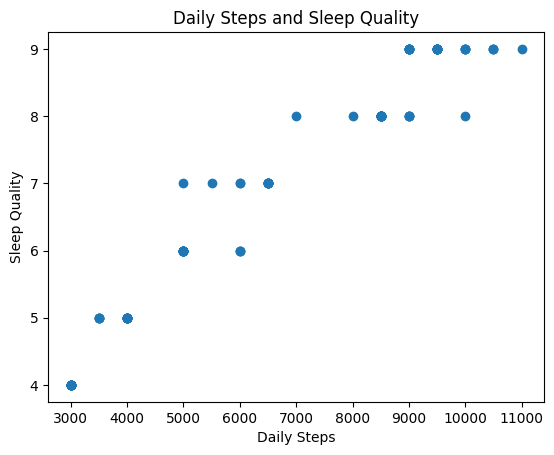

In [7]:
plt.scatter(data=df, x='Daily Steps', y='Sleep Quality')
plt.title('Daily Steps and Sleep Quality')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Quality')
plt.show()

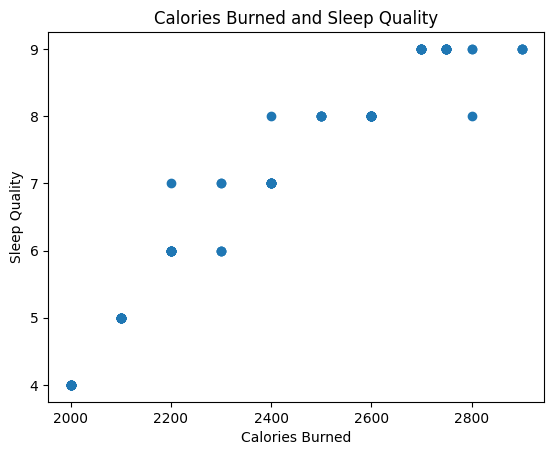

In [8]:
plt.scatter(data=df, x='Calories Burned', y='Sleep Quality')
plt.title('Calories Burned and Sleep Quality')
plt.xlabel('Calories Burned')
plt.ylabel('Sleep Quality')
plt.show()

In [9]:
df['Physical Activity Level'].value_counts()
physical_sleep = df.groupby('Physical Activity Level')['Sleep Quality'].mean().round(2).sort_values()
print(physical_sleep)


Physical Activity Level
low       4.62
medium    7.16
high      8.56
Name: Sleep Quality, dtype: float64


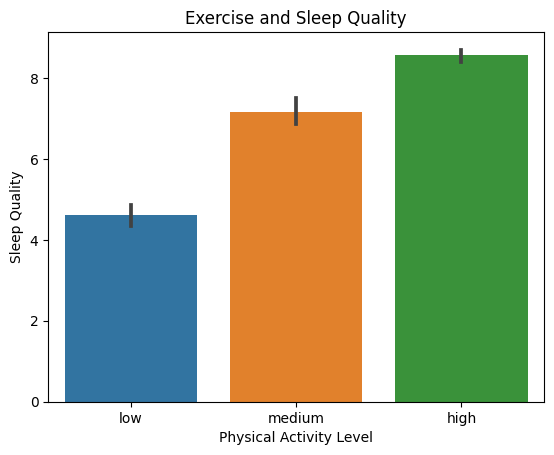

In [10]:
sns.barplot(data=df, x='Physical Activity Level', y='Sleep Quality', order = ['low', 'medium', 'high']).set_title('Exercise and Sleep Quality')
plt.show()

The scatter plots show a clear relationship between exercise and sleep quality. People who do more exercise by taking more steps and burning more calories each day, have a higher level of sleep quality. 

The bar graph clearly shows the relationship between physical activity and sleep quality. People wih a medium level of physical activity have an average sleep quality of 7.16, and people wih a high level of physical activity have an average sleep quality of 8.56. However, people wih a low level of physical activity have an average sleep quality of just 4.62. This suggests that engaging in physical activity could have positive effects for people suffering from a low level of sleep quality.

We should also note that physical activity alone may not be enough to solve problems with sleep quality. It is expected that people who engage in physical activity would also lead overall healthy lives by eating a healthy diet and maintaining a regular bedtime before midnight. We will need to do more analysis to understand all the factors associated with a high level of sleep quality.

# Sleep Habits and Sleep Quality

[]

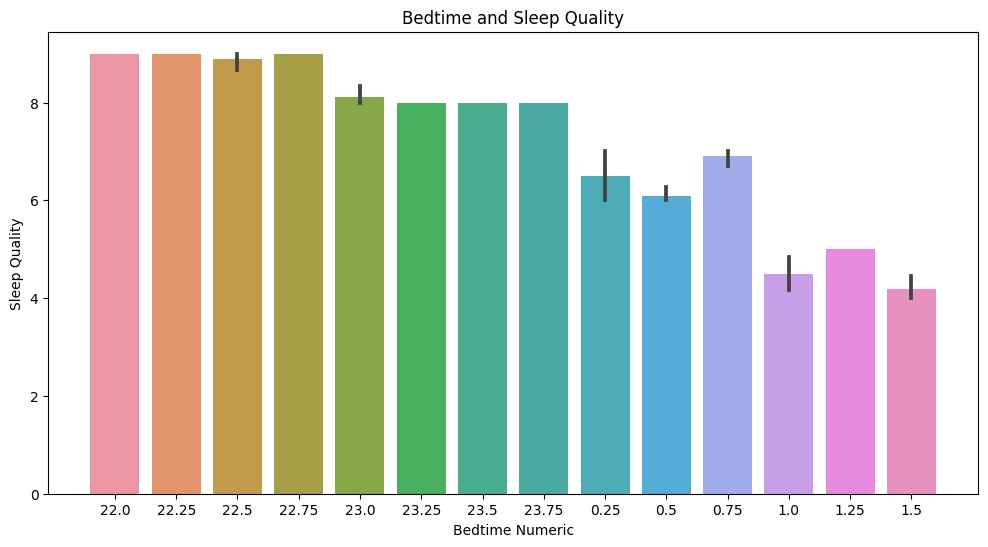

In [11]:
# a function which accepts a list of bedtimes and returns them in order
def bedtime_order(L):
    early_list = []
    late_list = []
    for t in L:
        if t not in early_list and t > 12:
            early_list.append(t)
        if t not in late_list and t < 12:
            late_list.append(t)
    
    early_list = np.sort(early_list)
    late_list = np.sort(late_list)
    return np.append(early_list, late_list)

bedtime_sorted = bedtime_order(df['Bedtime Numeric'])

plt.figure(figsize=(12,6))
sns.barplot(x='Bedtime Numeric', y='Sleep Quality', data=df, order = bedtime_sorted).set_title('Bedtime and Sleep Quality')
plt.plot()

The bar graph clearly shows that an earlier bedtime is associated with a better sleep quality. People who go to bed before 11:00 pm report a sleep quality of about 9, while people who go to bed between 11:00 pm and mdnight report a sleep quality of about 8. However, there is a significant decline in sleep quality when people go to bed after mdnight. People who go to bed between mdnight and 1:00 am report a sleep quality of about  6 or 7, while people who go to bed after 1:00 am report a sleep quality of about 4 or 5.

We should also note that bedtime alone may not be enough to solve problems with sleep quality. It is expected that people who sleep earlier would also lead overall healthy lives by eating a healthy diet and maintaining a regular exercise schedule. We will need to do more analysis to understand all the factors associated with a high level of sleep quality.

[]

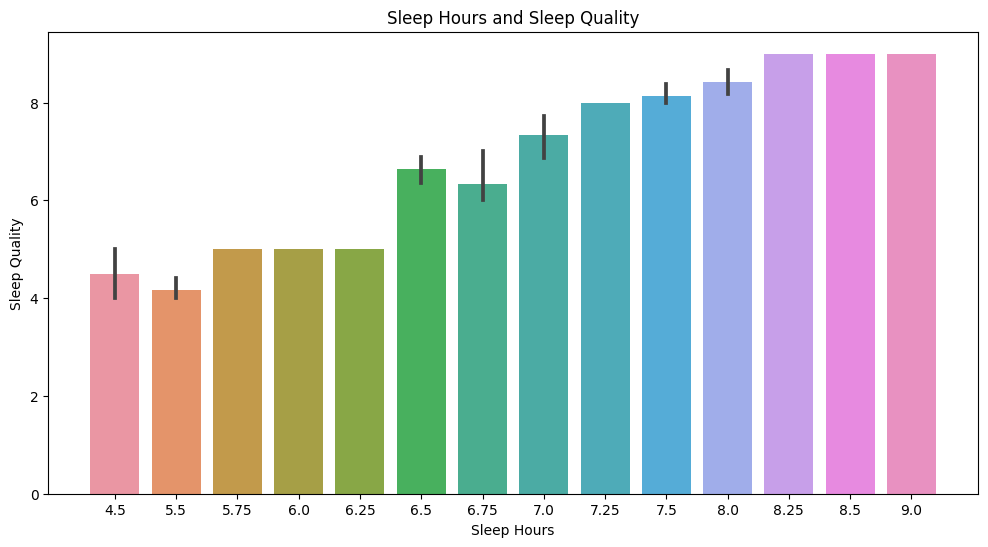

In [12]:
plt.figure(figsize=(12,6))
#plt.scatter(x=df['Sleep_Hours'], y=df['Sleep Quality'])
sns.barplot(x='Sleep Hours', y='Sleep Quality', data=df).set_title('Sleep Hours and Sleep Quality')
plt.plot()

The bar graph clearly shows that more hours of sleep is associated with a higher level of sleep quality. This seems like an obvious result, but it is good to confirm this result with the data. Sometimes people claim that they only need a few hours of sleep per night, such as 5 or 6 hours. However, this graph shows that it is important to get at least 8 hours of sleep per night to maintain a high level of sleep quality.

[]

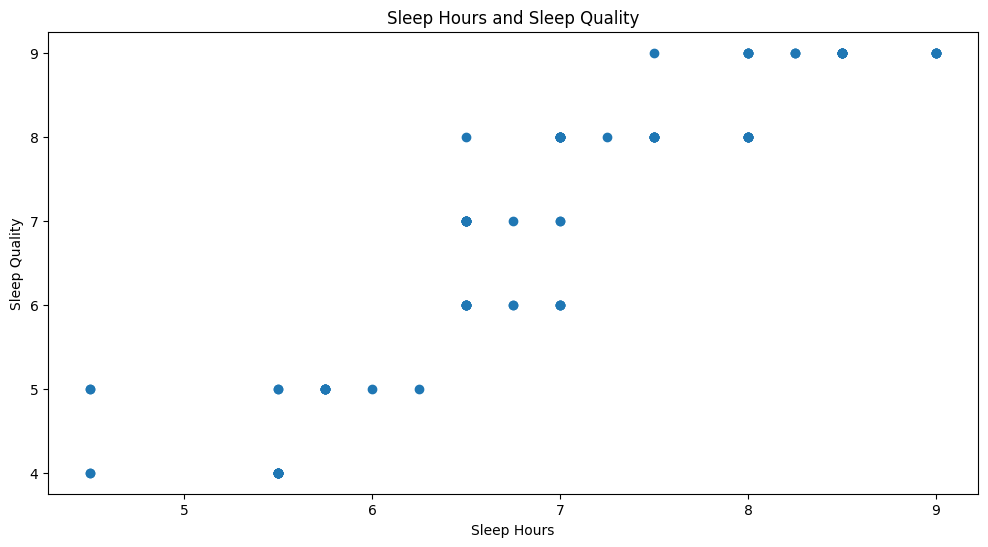

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(x=df['Sleep Hours'], y=df['Sleep Quality'])
plt.title('Sleep Hours and Sleep Quality')
plt.xlabel('Sleep Hours')
plt.ylabel('Sleep Quality')
plt.plot()

As one would expect, longer hours of sleep are associated with a higher level of sleep quality Next we will use regresssion to plot the line of best fit to show how the level of sleep quality depends on the number of sleep hours.

In [14]:
hours_quality_model = LinearRegression()

x = df[['Sleep Hours']]
y = df['Sleep Quality']
hours_quality_model.fit(x,y)
b = hours_quality_model.intercept_
m = hours_quality_model.coef_
predictions = hours_quality_model.predict(x)
print(m)

[1.36940999]


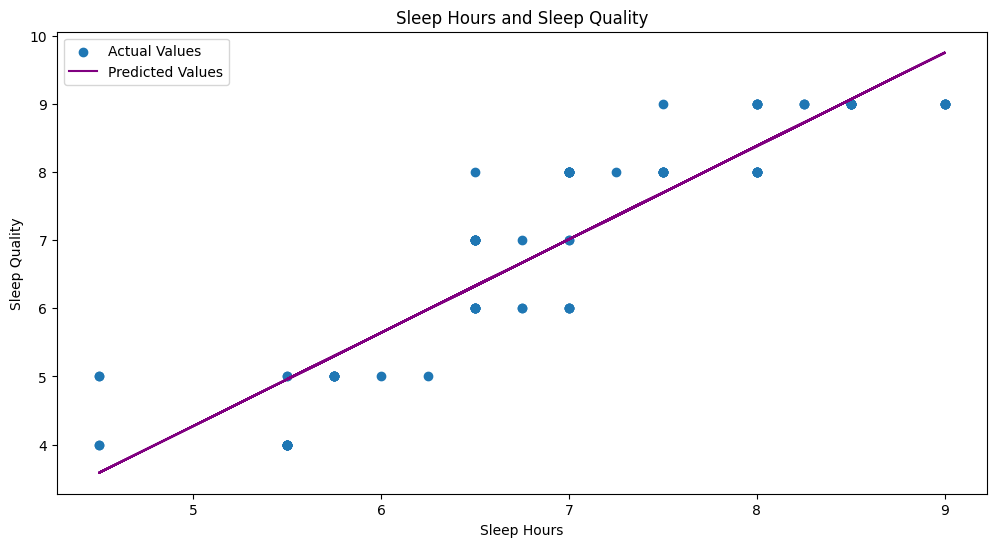

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(x,y, label='Actual Values')
plt.plot(x, predictions, color='purple', label="Predicted Values")
plt.legend()
plt.title('Sleep Hours and Sleep Quality')
plt.xlabel('Sleep Hours')
plt.ylabel('Sleep Quality')
plt.show()

The line of best fit shows how sleep quality increases with the number of sleep hours. This seems like an obvious result, but it is useful that the data demonstrates this result clearly.

# Diet and Sleep Quality

In [16]:
df.groupby('Dietary Habits')['Sleep Quality'].mean().round(2).sort_values()

Dietary Habits
unhealthy    5.17
medium       7.70
healthy      8.86
Name: Sleep Quality, dtype: float64

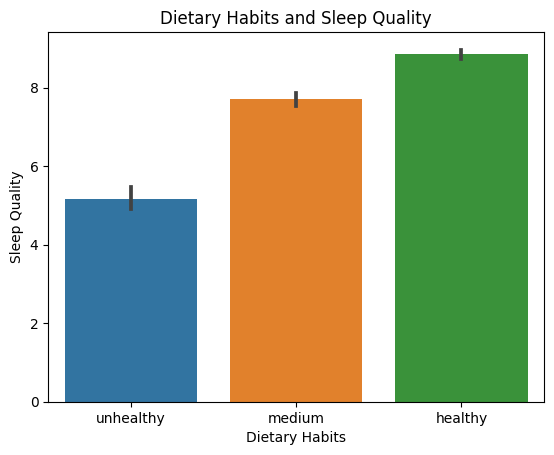

In [17]:
sns.barplot(data=df, x='Dietary Habits', y='Sleep Quality', order=['unhealthy', 'medium', 'healthy']).set_title('Dietary Habits and Sleep Quality')
plt.show()

The bar graph clearly shows the relationship between dietary habits and sleep quality. People wih medium dietary habits have an average sleep quality of 7.70, and people wih healthy dietary habits have an average sleep quality of 8.86. However, people wih unhealthy dietary habits have an average sleep quality of just 5.17. This suggests that maintaining a healthy diet could have positive effects for people suffering from a low level of sleep quality.

We should also note that a healthy diet alone may not be enough to solve problems with sleep quality. It is expected that people who maintain healty diets would also lead overall healthy lives by doing physical exercise and maintaining a regular bedtime before midnight. We will need to do more analysis to understand the factors associated with a high level of sleep quality.

# Age and Sleep Quality

In [18]:
Age_Sleep_corr = df[['Age', 'Sleep Quality']].corr()
Age_Sleep_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


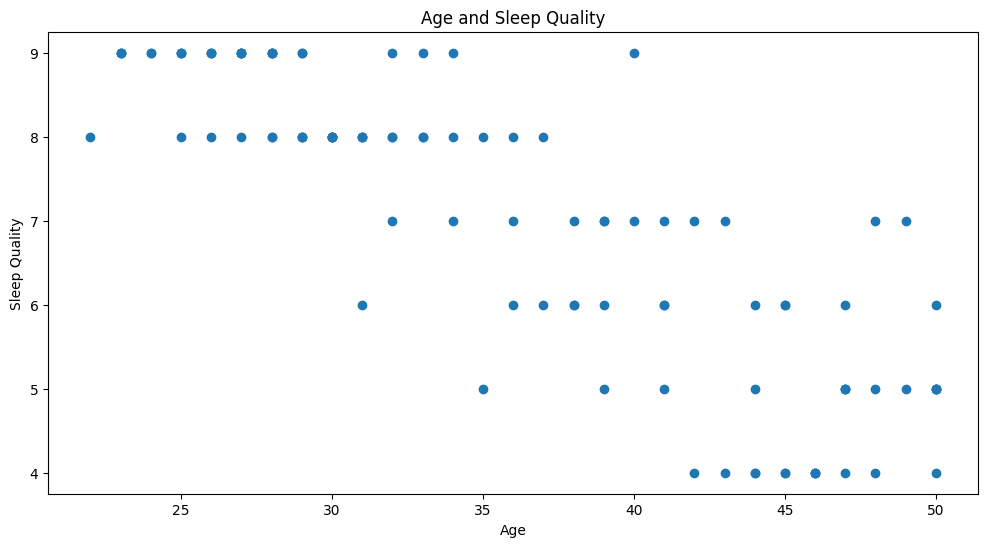

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(df['Age'], df['Sleep Quality'])
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.title('Age and Sleep Quality')
plt.show()

The scatter plot shows that older ages are associated with a lower level of sleep quality Next we will use regresssion to plot the line of best fit to show the relationship between sleep quality and age.

In [20]:
age_sleep_model = LinearRegression()

x = df[['Age']]
y = df['Sleep Quality']
age_sleep_model.fit(x,y)
b = age_sleep_model.intercept_
m = age_sleep_model.coef_
predictions = age_sleep_model.predict(x)

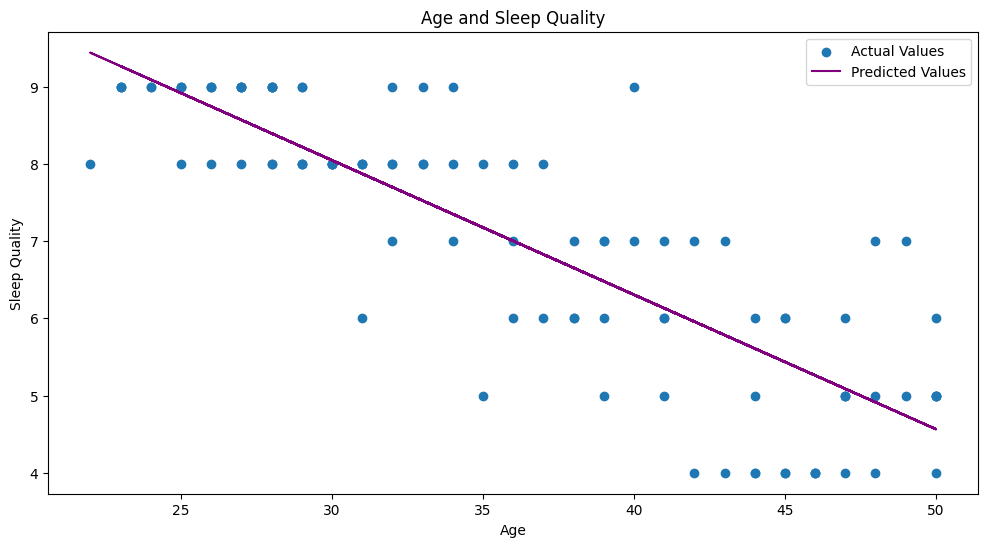

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(x,y, label='Actual Values')
plt.plot(x, predictions, color='purple', label="Predicted Values")
plt.title('Age and Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()

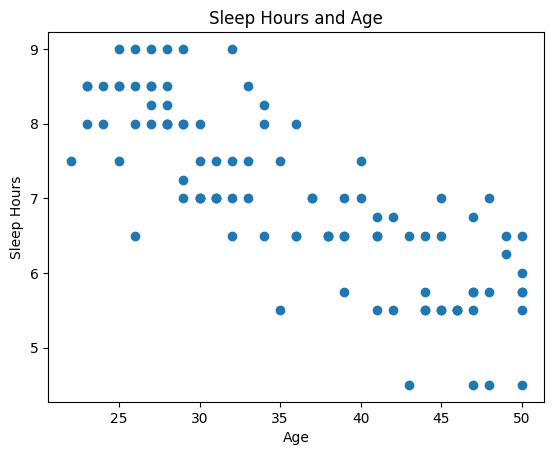

In [22]:
plt.scatter(df['Age'], df['Sleep Hours'])
plt.xlabel('Age')
plt.ylabel('Sleep Hours')
plt.title('Sleep Hours and Age')
plt.show()

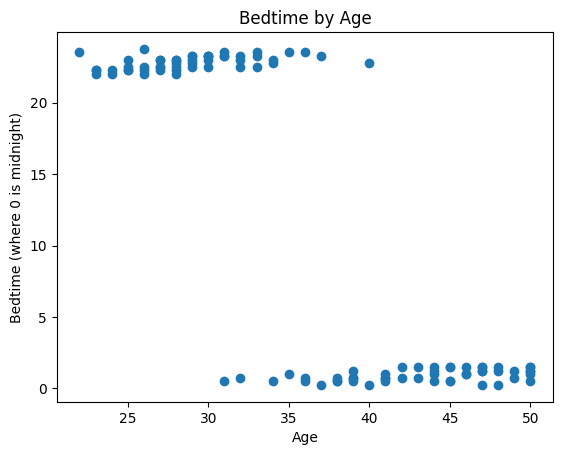

In [23]:
plt.scatter(df['Age'], df['Bedtime Numeric'])
plt.xlabel('Age')
plt.ylabel('Bedtime (where 0 is midnight)')
plt.title('Bedtime by Age')
plt.show()

Next, we will examine the average ages for the different categories of physical activity and dietary habits. 

In [38]:
df.groupby('Physical Activity Level')['Age'].mean().round(2).sort_values(ascending=False)

Physical Activity Level
low       45.27
medium    36.79
high      28.50
Name: Age, dtype: float64

In [25]:
df.groupby('Dietary Habits')['Age'].mean().round(2).sort_values(ascending=False)

Dietary Habits
unhealthy    43.83
medium       33.40
healthy      27.66
Name: Age, dtype: float64

The line of regression clearly shows a downward trend in sleep quality as people get older. However, this downward trend can be explained by several factors. 

The scatter plots show that people tend to go to bed later as they get older. Younger people tend to go to bed before midnight, while older people tend to go to bed after midnight. As a result, the number of hours of sleep decreases for older people in this study. A lower level of sleep quality reported by older people suggests that sleep quality is affected by a later bedtime.

The charts show that younger people do more physical activity and have healthier diets compared with older people. This behavior is strongly correlated with sleep quality.

Therefore, it seems that lower sleep quality experienced by older people is not due to some natural aging effect, rather it is caused by unhealthy lifestyles overall. If older people make an effort to go to bed before midnght, do physical exercise, and eat a healty diet, it seems likely that sleep quality can improve. More research and more data is neessary to verify this hypothesis.

# Gender and Sleep Quality

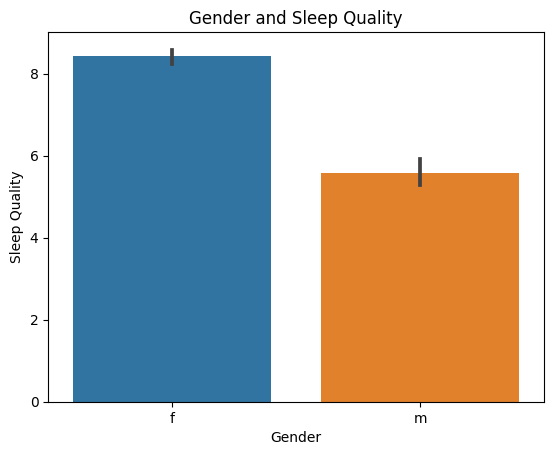

In [26]:
df['Gender'].value_counts()
sns.barplot(data = df, x ='Gender', y ='Sleep Quality').set_title('Gender and Sleep Quality')
plt.show()

In [27]:
male_sleep = df[df['Gender'] == 'm']['Sleep Quality']
female_sleep = df[df['Gender'] == 'f']['Sleep Quality']

male_activity = df[df['Gender'] == 'm']['Physical Activity Numeric']
female_activity = df[df['Gender'] == 'f']['Physical Activity Numeric']

**Statistical Tests (t-values and p-values)**

In [28]:
t_sleep, p_sleep = stats.ttest_ind(male_sleep, female_sleep)

print(f't_stat for Sleep Quality versus Gender: {t_sleep:.2f}')
print(f'p_stat for Sleep Quality versus Gender: {p_sleep:.2f}')

t_physical, p_physical = stats.ttest_ind(male_activity, female_activity)

print(f't_stat for Physical Activity versus Gender: {t_physical:.2f}')
print(f'p_stat for Physical Activity versus Gender: {p_physical:.2f}')

t_stat for Sleep Quality versus Gender: -14.32
p_stat for Sleep Quality versus Gender: 0.00
t_stat for Physical Activity versus Gender: -10.98
p_stat for Physical Activity versus Gender: 0.00


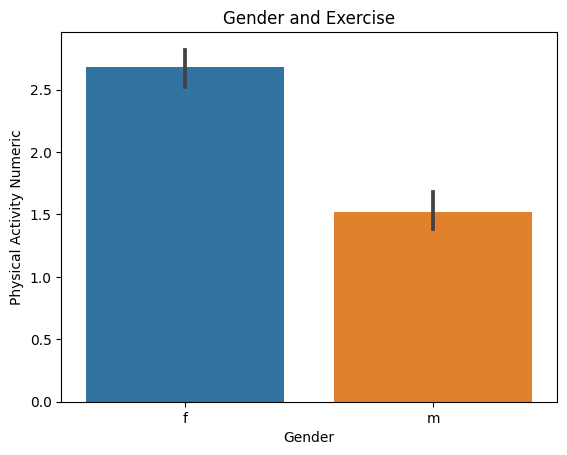

In [29]:
sns.barplot(data=df, x='Gender', y='Physical Activity Numeric').set_title('Gender and Exercise')
plt.show()

In [30]:
df.groupby('Gender')[['Sleep Quality', 'Age', 'Dietary Numeric', 'Physical Activity Numeric', 'Daily Steps', 'Calories Burned', 'Sleep Hours', 'Bedtime Numeric']].mean().round(2)

,Sleep Quality,Age,Dietary Numeric,Physical Activity Numeric,Daily Steps,Calories Burned,Sleep Hours,Bedtime Numeric
Gender,,,,,,,,
f,8.42,29.44,2.54,2.68,8940.0,2654.0,7.89,22.38
m,5.58,42.58,1.22,1.52,4720.0,2188.0,6.10,1.35


The t-stat and p-stat show that there is a statistically significant difference in sleep quality between males and females. That is, in general, females report a higher level of sleep quality. However, this difference can be explained by several factors. 

The table shows the females in this study have an average age of 29.44 while the males have an average age of 42.58. As we have already seen above, older people tend to report a lower level of sleep quality due to several factors such as physical exercise, diet, and bedtime. 

The table shows that on average, females have a much healthier diet (females: 2.54 out of 3.0, males: 1.22 out of 3.0), females do more exercise (females: 2.68 out of 3.0, males: 1.52 out of 3.0), females take more steps each day (females: 8940 steps, males: 4720 steps), females burn more calories (females: 2654 calories, males: 2188 calories), females get more hours of sleep (females: 7.9 hours, males: 6.1 hours), and females have an earlier bedtime (females: 10:23 pm, males: 1:21 am). As a result of all of these factors, a lower level of sleep quality (females: 8.42, males: 5.58) is reported by males compared with females.

Therefore, it seems that lower sleep quality experienced by males is not due to some natural effect of gender, rather it is caused by unhealthy lifestyles overall. If people make an effort to go to bed before midnght, do physical exercise, and eat a healty diet, it seems likely that sleep quality can improve.

# Medication, Sleep Disorders, and Sleep Quality

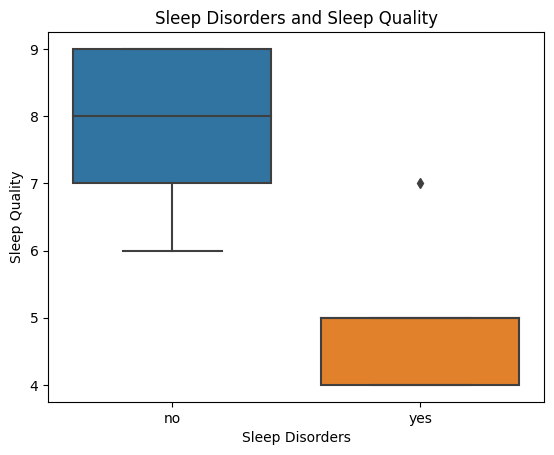

In [31]:
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df).set_title('Sleep Disorders and Sleep Quality')
plt.show()

In [32]:
disorders = df[df['Sleep Disorders'] == 'yes']
disorders.sort_values('Sleep Quality', ascending=False)[:5]

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Physical Activity Numeric,Dietary Numeric,Bedtime Numeric,Wakeup Numeric,Sleep Hours
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes,1,1,0.50,7.0,6.50
69,70,48,m,5,01:15,07:00,4000,2100,low,unhealthy,yes,no,1,1,1.25,7.0,5.75
53,54,44,m,5,01:15,07:00,4000,2100,low,unhealthy,yes,no,1,1,1.25,7.0,5.75
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no,1,1,1.00,6.5,5.50
45,46,47,m,5,01:30,06:00,3500,2100,low,unhealthy,yes,no,1,1,1.50,6.0,4.50


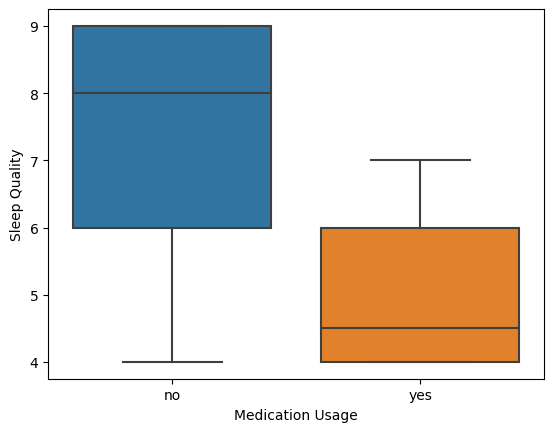

In [33]:
sns.boxplot(x='Medication Usage', y='Sleep Quality', data=df)
plt.show()

In [34]:
df.groupby('Sleep Quality')['Medication Usage'].value_counts()

Sleep Quality  Medication Usage
4              yes                 10
               no                   2
5              no                  10
               yes                  3
6              no                   9
               yes                  4
7              no                   9
               yes                  3
8              no                  25
9              no                  25
Name: count, dtype: int64

In [35]:
df.groupby('Sleep Quality')['Sleep Disorders'].value_counts()

Sleep Quality  Sleep Disorders
4              yes                12
5              yes                13
6              no                 13
7              no                 11
               yes                 1
8              no                 25
9              no                 25
Name: count, dtype: int64

Everyone with a sleep quality of 4 or 5 is diagnosed with a sleep disorder. It seems likely that the effects of any sleep disorder can be mitigated by maintaining healthy lifestyles. Only one person with a sleep quality of 6 or more is diagnosed with a sleep disorder.

# Characterizing Different Levels of Sleep Quality

In [36]:
sleep_summary = df.groupby('Sleep Quality')[['Age', 'Bedtime Numeric', 'Sleep Hours', 'Calories Burned', 'Daily Steps', 'Physical Activity Numeric', 'Dietary Numeric']].mean().round(1)
print(sleep_summary)

                Age  Bedtime Numeric  Sleep Hours  Calories Burned  \
Sleep Quality                                                        
4              45.5              1.4          5.3           2000.0   
5              45.9              1.2          5.6           2100.0   
6              40.9              0.5          6.7           2223.1   
7              40.1              0.6          6.6           2366.7   
8              30.3             23.2          7.4           2580.0   
9              27.5             22.4          8.4           2760.0   

               Daily Steps  Physical Activity Numeric  Dietary Numeric  
Sleep Quality                                                           
4                   3000.0                        1.0              1.0  
5                   3846.2                        1.0              1.0  
6                   5230.8                        2.0              1.0  
7                   6208.3                        1.9              1.8  
8

All the paticipants in this study with a sleep quality of 4 or 5 are classified as having a sleep disorder. The data shows that, in general, people with a low sleep quality have unhealthy diets, low levels of exercise, and a later bedtime. Thirteen of the 25 people with a sleep quality of 4 or 5 take medicine. This suggests that medicine is not particularly effective at improving sleep quality. The data suggests that physical exercise, a healthy diet, and earlier bedtimes can improve sleep quality.

There are 13 people with a sleep quality of 6. All of these people are males with an average age of 40.9. None of these people take medicine. Although they all have an unhealthy diet, they all have a physical activity level of medium. They get an average of 6.7 hours of sleep each night. This data suggets that simply increasing the level of physical activity to a moderate level can help to improve sleep quality. That is, perhaps some people with a sleep quality of 4 or 5 could improve their seep quality just by doing a moderate amount of exercise. If they would also eat healthier diets and mantain an earlier bedtime, it seems that they could improve their sleep quality even more.

# Conclusion

The data shows the importance of maintaining good habits to promote a healthy life. There is not just one single factor which results in a high level of sleep quality. Rather, there are several healthy habits that people should maintain in order to have a high level of sleep quality, and to maintain good health overall. The data shows that a healthy diet, regular exercise, bedtime before midnight, and at least eight hours of sleep per night are important factors to maintain a high level of sleep quality.

The data shows differences in sleep quality between females and males, as well as between younger people and older people. That is, in general, females reported better sleep quality than males, and younger people reported better sleep quality than older people. However, by analyzing the data, it was found that these differences can be explained by differences in lifestyles. Females and younger people tended to maintain a healthy diet, get regular exercise, keep a bedtime before midnight, and get at least eight hours of sleep per night, whereas males and older people did not.

Everyone with a sleep quality of 4 or 5 is listed as having a sleep disorder. Of these 25 people, 13 people take medicine while 12 people do not take medicine. This suggests that medicine usage is not the solution. Rather, the data shows that a more effective solution is a healthy diet, regular physical exercise, and a bedtime before midnight with at least eight hours of sleep each night.

# Future Research Suggestions

For future research, it would be valuable to put those people with a low sleep quality of 4 or 5 on a healthier lifestyle regimen. The hypothesis is that a healthy diet, physical exercise, and a regular bedtime before midnight will help to improve their sleep quality. After following a healthy lifestyle program for a certain number of weeks, it would be valuable to observe any changes in sleep quality.

Another area of research would be to inquire about the unhealthy lifestyles led by older people. That is, why are people unable to maintain a healthy lifestyle as they get older? Why is the bedtime later? Why does physical exercise decrease and why does the diet become more unhealthy? It would be useful to investigate factors such as work commitments,family responsibiities, stress, financial issues, etc...to see if the problems can be identified. Perhaps there could be ways to help people maintain healthier lifestyles as they grow older.
